<a href="https://colab.research.google.com/github/k4karthi/Indian-Sign-Language-to-Text-Conversion/blob/main/random_forest_mediapipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Importing Libraries

In [8]:
!git clone https://github.com/AssemblyAI-Examples/mediapipe-python.git
!pip install mediapipe
!pip install PyQt5
!pip install ipython==7.32.0

Cloning into 'mediapipe-python'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 45 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 31.45 MiB | 19.95 MiB/s, done.
Resolving deltas: 100% (14/14), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency res

In [ ]:
import urllib.request
import pickle
import matplotlib as mpl
from matplotlib import animation
import PyQt5
from PIL import Image
from IPython.display import HTML
import importlib
from base64 import b64encode



In [1]:
import os
import cv2
import random
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import joblib

import mediapipe as mp

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    roc_curve,
    auc
)
from sklearn.preprocessing import LabelBinarizer


##Initializing Mediapipe

In [ ]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.5)

In [ ]:
data_dir = 'path containing augmented images'
data = []
labels = []
for i in (os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i)):
            data_aux = []
            img_path = os.path.join(data_dir,i,j)
            img = cv2.imread(img_path)

            # Check if the image was loaded successfully
            if img is None:
                print(f"Error loading image: {img_path}")
                continue  # Skip to the next image

            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for z in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[z].x
                        y = hand_landmarks.landmark[z].y
                        data_aux.append(x)
                        data_aux.append(y)
                data.append(data_aux)
                labels.append(i)

# save data
f = open('data.pickle', 'wb')
pickle.dump({'data':data,'labels':labels},f)
f.close()

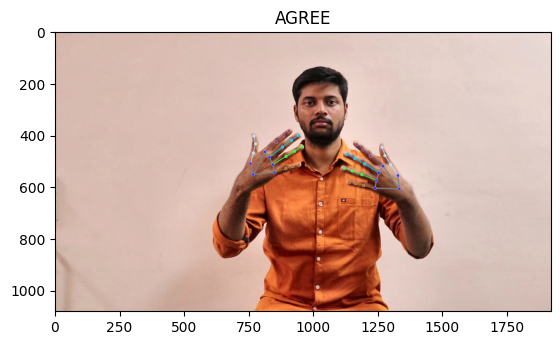

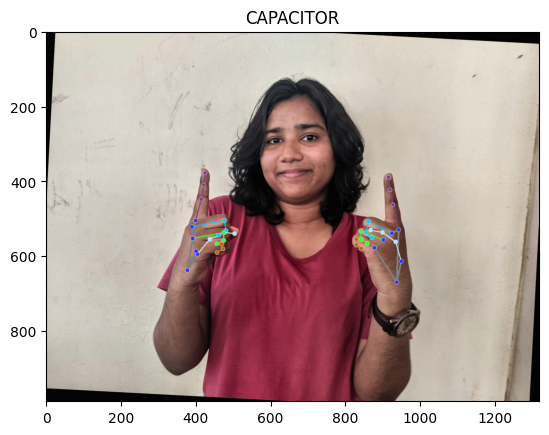

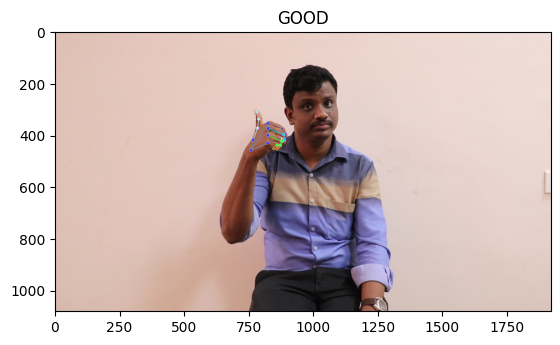

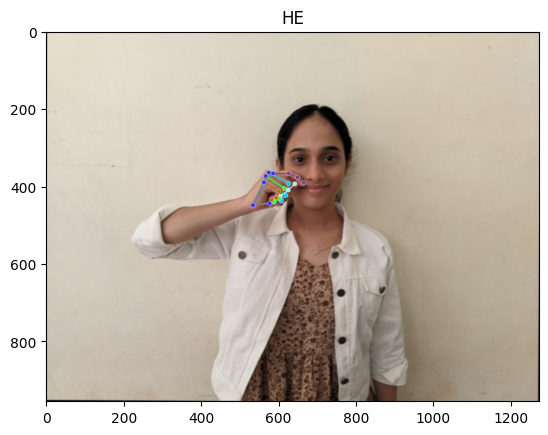

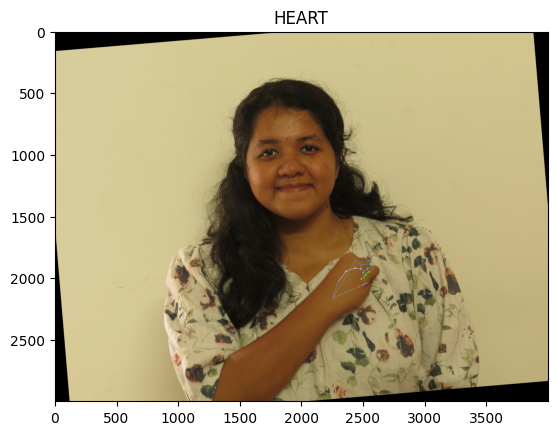

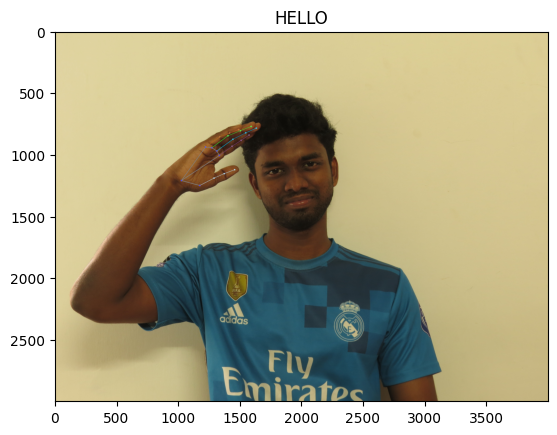

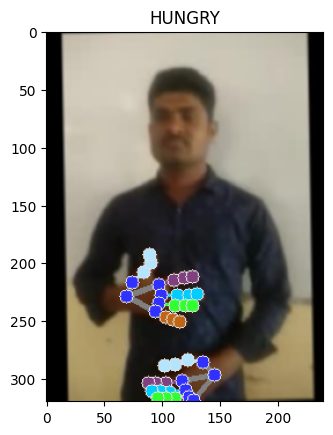

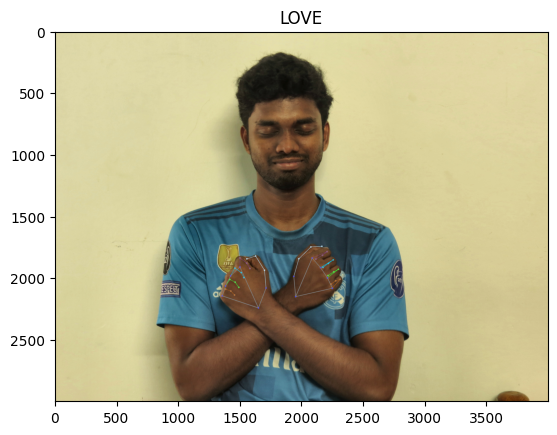

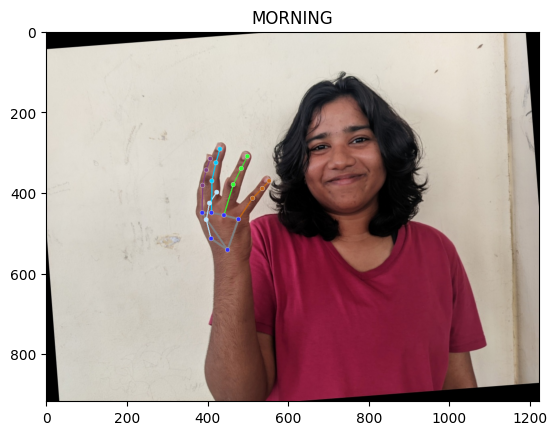

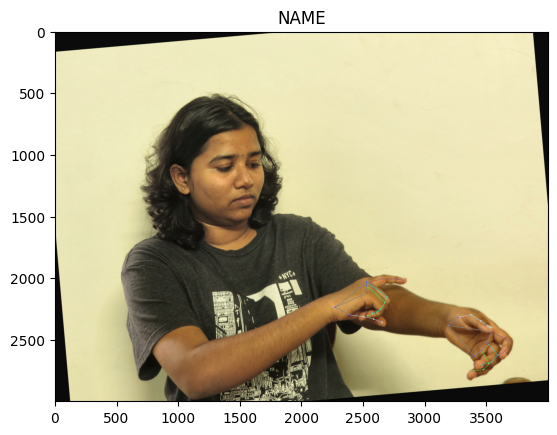

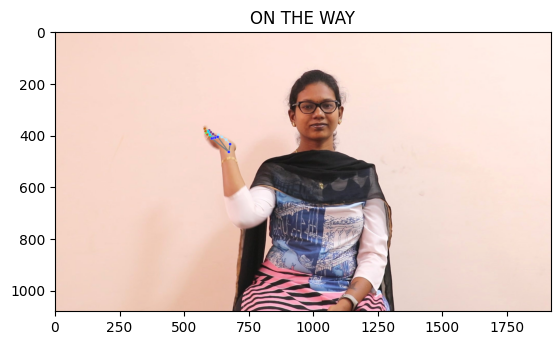

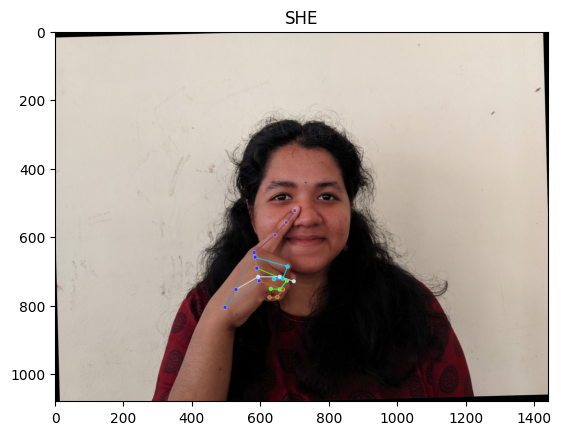

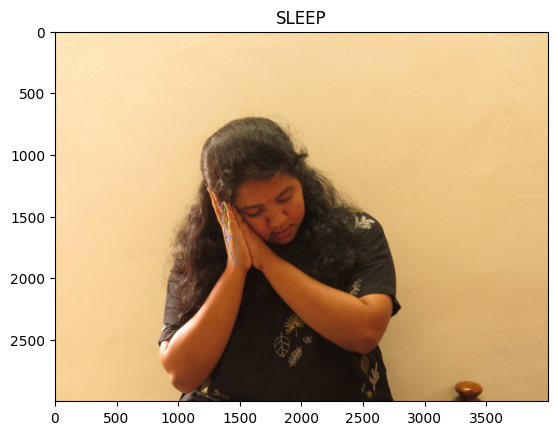

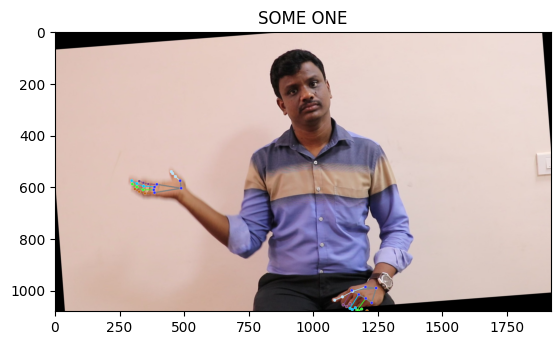

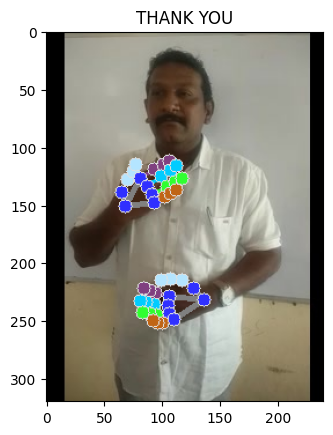

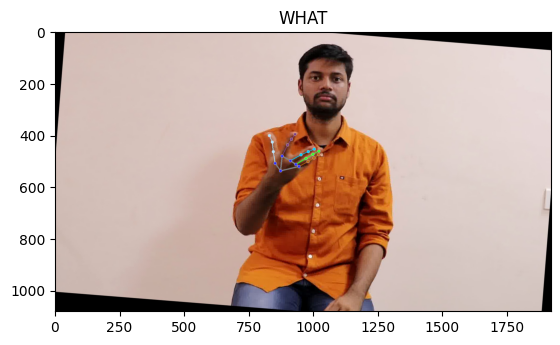

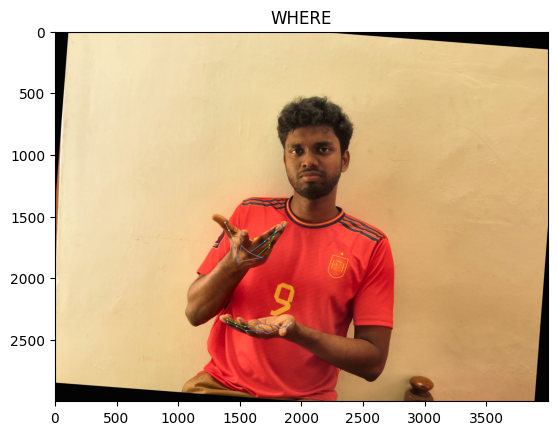

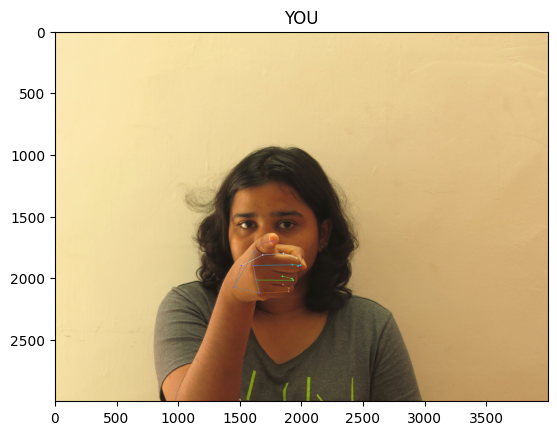

In [ ]:
# visualize landmarks
data_dir = 'path containing augmented images'
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i))[0:1]:
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        img_rgb, # img to draw
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()

                    )


            plt.figure()
            plt.title(i)
            plt.imshow(img_rgb)
plt.show()

##Model Training

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Pad the data to have the same length for all samples
max_len = max(len(row) for row in data)
padded_data = [row + [0] * (max_len - len(row)) for row in data]

# Now convert the padded data to a NumPy array
X = np.array(padded_data)

# Proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.15, random_state=22, shuffle=True)

# model
model = RandomForestClassifier(random_state=22)
model.fit(X_train, y_train)

# predict
pred = model.predict(X_test)

# accuracy
accuracy_score(y_test, pred)

0.998952331063384

##Testing and Evaluation

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Pad the data to have the same length for all samples
max_len = max(len(row) for row in data)
padded_data = [row + [0] * (max_len - len(row)) for row in data]

# Now convert the padded data to a NumPy array
X = np.array(padded_data)

# Proceed with train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, labels, test_size=0.30, random_state=22, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=22, shuffle=True)

# Initialize and train the model
model = RandomForestClassifier(random_state=22)
model.fit(X_train, y_train)

# Validation Accuracy
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Test Accuracy
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9990
Test Accuracy: 0.9990


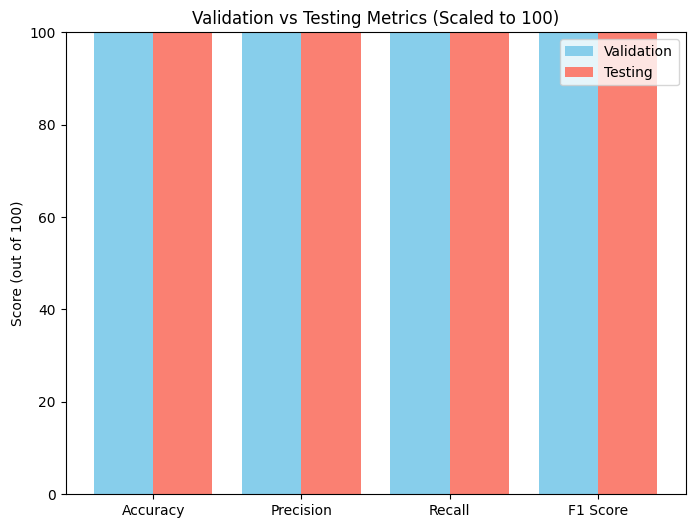

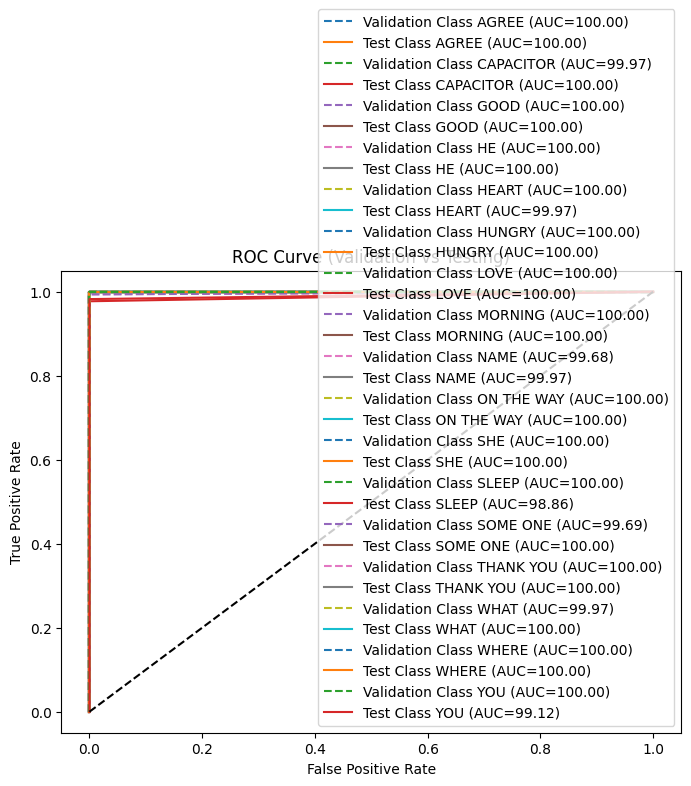

In [ ]:
# Convert scores to multiples of 100
val_scores_100 = [score * 100 for score in val_scores]
test_scores_100 = [score * 100 for score in test_scores]

# 🎯 Plot Accuracy, Precision, Recall, F1-score (out of 100)
plt.figure(figsize=(8, 6))
x = range(len(metrics))
plt.bar(x, val_scores_100, width=0.4, label='Validation', color='skyblue', align='center')
plt.bar([p + 0.4 for p in x], test_scores_100, width=0.4, label='Testing', color='salmon', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.ylim(0, 100)
plt.ylabel('Score (out of 100)')
plt.title('Validation vs Testing Metrics (Scaled to 100)')
plt.legend()
plt.show()

# 🎯 AUC-ROC Curve remains the same since it's a proportion
plt.figure(figsize=(8, 6))
for i in range(y_test_bin.shape[1]):
    fpr_val, tpr_val, _ = roc_curve(y_val_bin[:, i], y_val_pred_bin[:, i])
    fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_pred_bin[:, i])

    roc_auc_val = auc(fpr_val, tpr_val) * 100
    roc_auc_test = auc(fpr_test, tpr_test) * 100

    plt.plot(fpr_val, tpr_val, linestyle='--', label=f'Validation Class {lb.classes_[i]} (AUC={roc_auc_val:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test Class {lb.classes_[i]} (AUC={roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation vs Testing)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  45   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 139   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  42   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 185   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  55   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 155   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 175   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 161   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 128   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  51   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0  43   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 157   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 179 

##Model Serialization

In [ ]:
import joblib

# Save the trained model
joblib.dump(model, 'name of your model')

print("Model saved successfully!")


Model saved successfully!
